In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)


In [ ]:
#First 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

#Dataset Info
print("\nDataset Info:")
print(df.info())

#Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   specie

In [ ]:
#  Check for Missing Values
print("\nMissing Values in each column:")
print(df.isnull().sum())



Missing Values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


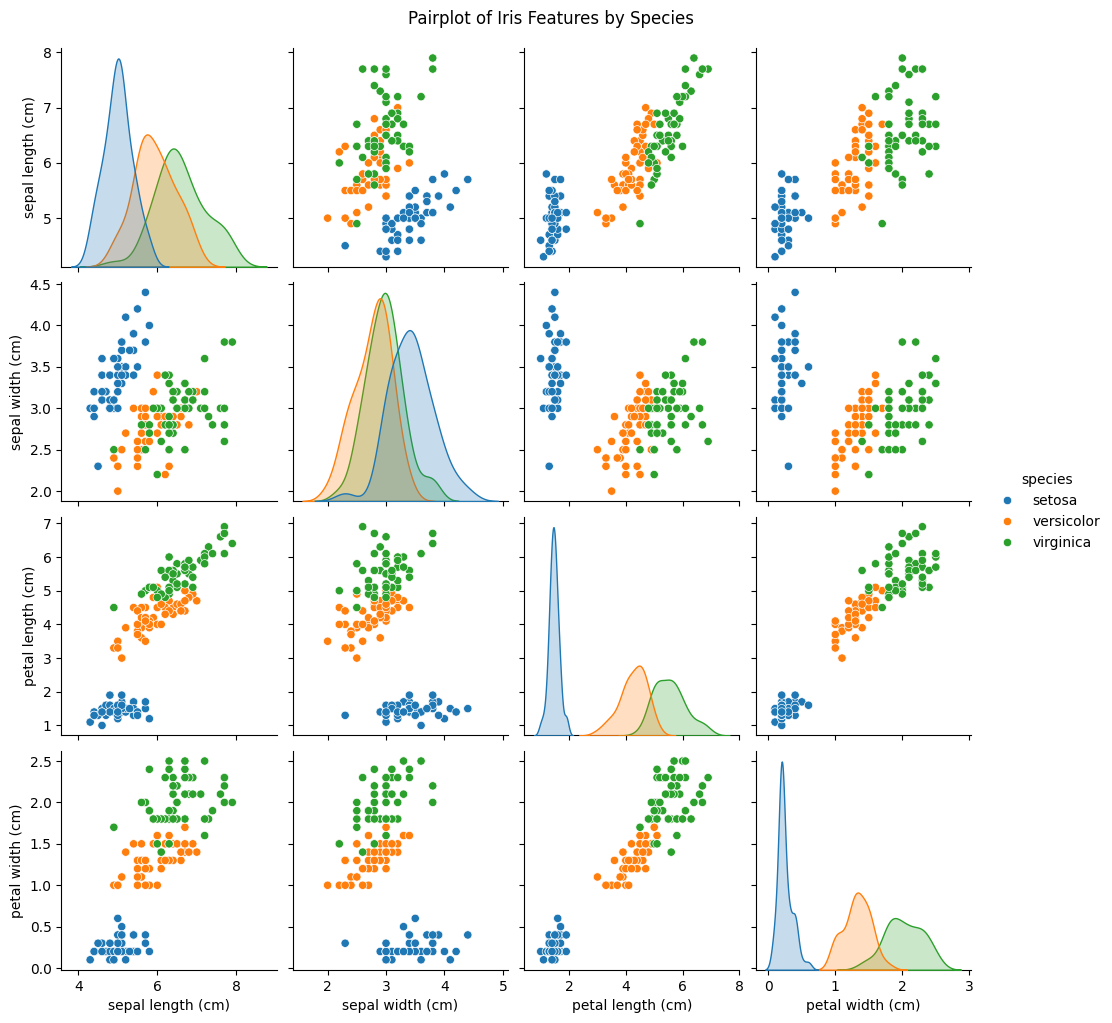

In [ ]:
#  Pairplot of Features Colored by Species
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()


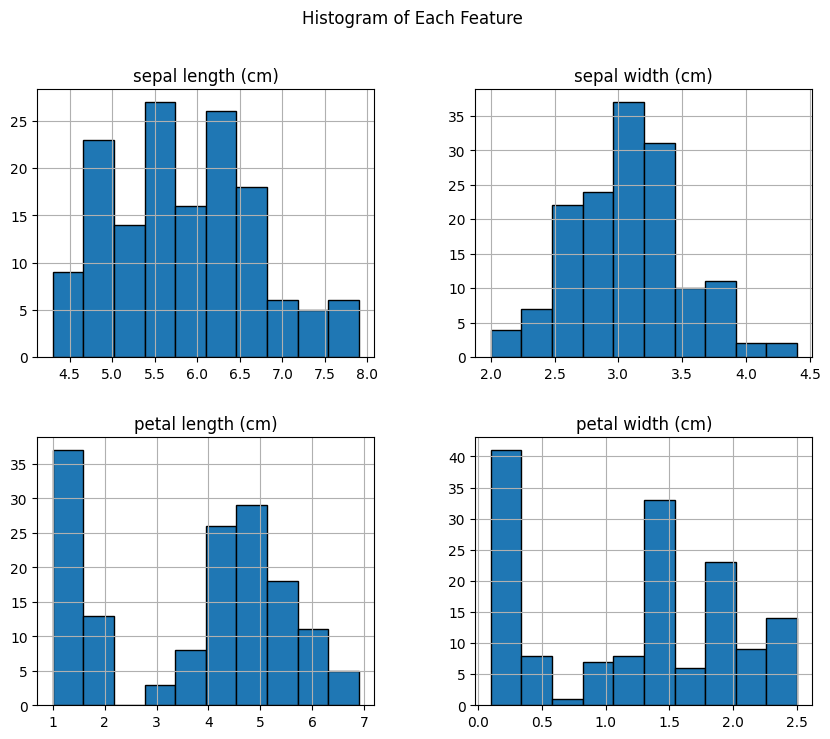

In [ ]:
#  Histogram of Each Feature
df.hist(edgecolor='black', figsize=(10,8))
plt.suptitle("Histogram of Each Feature")
plt.show()


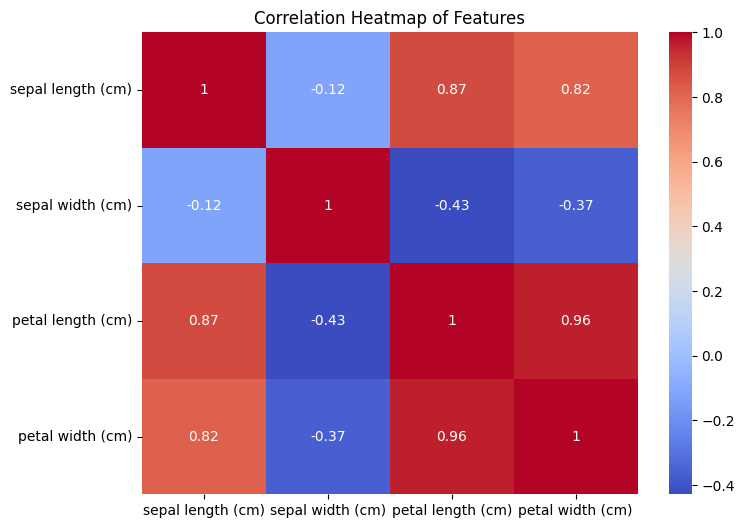

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


In [ ]:
# Create a new feature: Petal Area
df['petal area (cm^2)'] = df['petal length (cm)'] * df['petal width (cm)']

#  Check first 5 rows to confirm
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  petal area (cm^2)  
0  setosa               0.28  
1  setosa               0.28  
2  setosa               0.26  
3  setosa               0.30  
4  setosa               0.28  


In [ ]:
# Define a function to categorize sepal length
def sepal_length_category(length):
    if length < 5.5:
        return 'short'
    elif length < 6.5:
        return 'medium'
    else:
        return 'long'

#  Apply the function to create a new column
df['sepal length category'] = df['sepal length (cm)'].apply(sepal_length_category)

#  Check the distribution
print(df['sepal length category'].value_counts())


sepal length category
medium    63
short     52
long      35
Name: count, dtype: int64


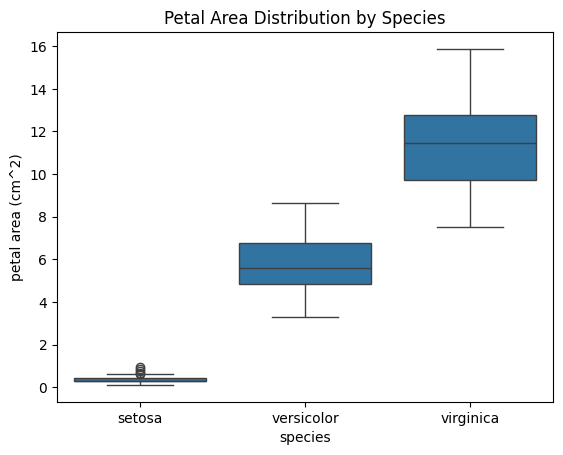

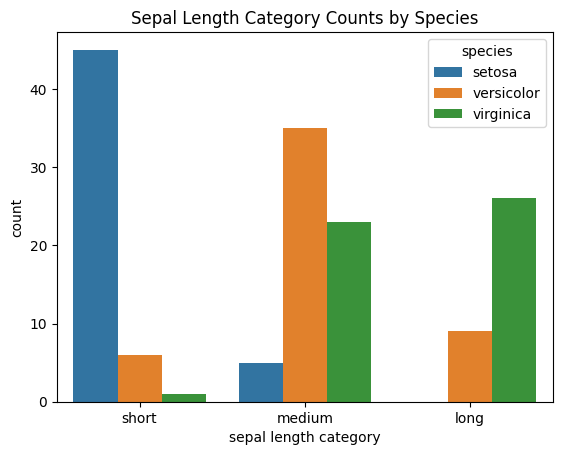

In [ ]:
# Boxplot of Petal Area by Species
sns.boxplot(x='species', y='petal area (cm^2)', data=df)
plt.title("Petal Area Distribution by Species")
plt.show()

#  Countplot of Sepal Length Categories by Species (if created)
sns.countplot(x='sepal length category', hue='species', data=df)
plt.title("Sepal Length Category Counts by Species")
plt.show()


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,petal area (cm^2),sepal length category
0,5.1,3.5,1.4,0.2,setosa,0.28,short
1,4.9,3.0,1.4,0.2,setosa,0.28,short
2,4.7,3.2,1.3,0.2,setosa,0.26,short
3,4.6,3.1,1.5,0.2,setosa,0.30,short
4,5.0,3.6,1.4,0.2,setosa,0.28,short
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.96,long
146,6.3,2.5,5.0,1.9,virginica,9.50,medium
147,6.5,3.0,5.2,2.0,virginica,10.40,long
148,6.2,3.4,5.4,2.3,virginica,12.42,medium


hyperparameter tuning

In [ ]:
# Load dataset
iris_data = load_iris()

# Create DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

# Features and labels
X = df.drop('species', axis=1)
y = df['species']


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model=DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#making predictions
sample_flowers = [[5.1, 3.5, 1.4, 0.2],
               [6.5, 3.0, 5.5, 2.0]]
sample_predict=model.predict(sample_flowers)
print(sample_predict)

['setosa' 'virginica']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Predict on test set
y_pred =model.predict(X_test)

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


In [ ]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}
    # Initialize Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [ ]:
# Get best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


In [ ]:
# New flower samples to predict (replace with your own measurements if you want)
new_flowers = [[5.1, 3.5, 1.4, 0.2],
               [6.5, 3.0, 5.5, 2.0]]

# Predict species
predictions = best_model.predict(new_flowers)

# Print predictions
for i, pred in enumerate(predictions):
    print(f"Flower {i+1} is predicted to be: {pred}")


Flower 1 is predicted to be: setosa
Flower 2 is predicted to be: virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Baseline model (with default parameters)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
import joblib

joblib.dump(model,'baseline_model.pkl')
joblib.dump(best_model,'tuned_model.pkl')

['tuned_model.pkl']

In [ ]:
# # Title
# st.title("Iris Flower Species Classifier")

# # Sidebar: Choose model
# model_choice = st.sidebar.selectbox("Select model to use:", ['Baseline Model', 'Tuned Model'])

# # Sidebar: Input features
# st.sidebar.header("Input Flower Measurements")
# def user_input_features():
#     sepal_length = st.sidebar.slider('Sepal Length (cm)', 4.0, 8.0, 5.8)
#     sepal_width  = st.sidebar.slider('Sepal Width (cm)', 2.0, 4.5, 3.0)
#     petal_length = st.sidebar.slider('Petal Length (cm)', 1.0, 7.0, 4.35)
#     petal_width  = st.sidebar.slider('Petal Width (cm)', 0.1, 2.5, 1.3)

#     data = {
#         'sepal length (cm)': sepal_length,
#         'sepal width (cm)' : sepal_width,
#         'petal length (cm)': petal_length,
#         'petal width (cm)' : petal_width
#     }
#     return pd.DataFrame(data, index=[0])

# input_df = user_input_features()



In [ ]:
# Load the models
import joblib

baseline_model = joblib.load('baseline_model.pkl')
tuned_model = joblib.load('tuned_model.pkl')

# Show input
#st.subheader('Your Input:')
#st.write(input_df)

# Prediction
#if model_choice == 'Baseline Model':
 #   prediction = baseline_model.predict(input_df)
#else:
 #   prediction = tuned_model.predict(input_df)

# Show prediction
#st.subheader('Predicted Species:')
#st.write(prediction[0])